In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import poisson
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random

In [381]:
import xgboost as xgb
from xgboost import plot_importance

In [382]:
import warnings
warnings.filterwarnings('ignore')

# 5월 27일 프로야구 롯데 자이언츠 vs 삼성 라이온즈 승부예측

## 데이터 불러오기

In [384]:
#csv파일이 한글 데이터를 포함하고 있어, enconding = 'euc-kr'로 지정함
ssftotal_df = pd.read_csv("./삼성 타자 종합 data.csv", encoding='euc-kr')
ssfoutcount_df = pd.read_csv("./삼성 타자 아웃카운트별 data.csv", encoding='euc-kr')
ssfposition_df = pd.read_csv("./삼성 타자 주자 위치별 data.csv", encoding='euc-kr')
ssfcount_df = pd.read_csv("./삼성 타자 카운트별 data.csv", encoding='euc-kr')
ssfpitcher_df = pd.read_csv("./삼성 상대투수별 타율.csv", encoding='euc-kr')

loftotal_df = pd.read_csv("./롯데 타자 종합 data.csv", encoding='euc-kr')
lofoutcount_df = pd.read_csv("./롯데 타자 아웃카운트별 data.csv", encoding='euc-kr')
lofposition_df = pd.read_csv("./롯데 타자 주자 위치별 data.csv", encoding='euc-kr')
lofcount_df = pd.read_csv("./롯데 타자 카운트별 data.csv", encoding='euc-kr')
lofpitcher_df = pd.read_csv("./롯데 상대 투수별 타율.csv", encoding='euc-kr')

In [385]:
ssftotal_df

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,김지찬,0.354,23,3,1,0,6,18,0,0,7,5,0.431,0.432,0.863
1,이재현,0.237,37,7,0,5,22,31,2,1,31,47,0.378,0.375,0.753
2,구자욱,0.265,43,12,0,8,28,37,1,4,24,28,0.488,0.356,0.844
3,디아즈,0.303,54,12,0,18,51,28,0,2,15,35,0.674,0.354,1.028
4,강민호,0.277,39,9,0,2,28,10,0,3,16,22,0.383,0.348,0.731
5,김영웅,0.252,34,5,1,6,23,16,0,2,8,44,0.437,0.295,0.732
6,박병호,0.205,25,3,0,9,20,18,0,2,19,44,0.451,0.331,0.782
7,류지혁,0.318,42,6,0,0,13,24,5,2,14,23,0.364,0.399,0.763
8,김성윤,0.355,50,11,2,2,20,32,4,1,20,20,0.504,0.436,0.940
9,김헌곤,0.268,26,3,0,2,5,14,2,0,5,13,0.361,0.324,0.685


In [386]:
ssfoutcount_df

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,김지찬,0.323,0.417,0.364
1,이재현,0.268,0.224,0.216
2,구자욱,0.327,0.305,0.146
3,디아즈,0.228,0.364,0.295
4,강민호,0.191,0.333,0.306
5,김영웅,0.297,0.234,0.235
6,박병호,0.217,0.370,0.102
7,류지혁,0.391,0.261,0.300
8,김성윤,0.417,0.326,0.289
9,김헌곤,0.261,0.279,0.258


In [387]:
ssfposition_df

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,김지찬,0.167,0.000,0.50,0.600,0.000,0.500,0.000
1,이재현,0.174,0.118,0.50,0.182,0.400,0.750,0.333
2,구자욱,0.286,0.077,0.00,0.381,0.600,0.000,0.500
3,디아즈,0.324,0.250,0.25,0.435,0.400,0.500,0.333
4,강민호,0.269,0.500,0.00,0.368,0.500,0.375,0.500
5,김영웅,0.333,0.333,0.25,0.308,0.286,0.167,0.400
6,박병호,0.080,0.455,0.00,0.111,0.000,NaN,0.200
7,류지혁,0.409,0.167,0.00,0.250,0.200,1.000,0.500
8,김성윤,0.250,0.412,1.00,0.250,0.500,0.750,0.500
9,김헌곤,0.320,0.100,1.00,0.000,0.000,0.500,0.000


## NAN값 채우기

In [388]:
cols = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
ssfposition_df[cols] = ssfposition_df[cols].apply(lambda row: row.fillna(row.mean()), axis=1)
ssfposition_df

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,김지찬,0.167,0.000,0.50,0.600,0.000,0.500,0.000
1,이재현,0.174,0.118,0.50,0.182,0.400,0.750,0.333
2,구자욱,0.286,0.077,0.00,0.381,0.600,0.000,0.500
3,디아즈,0.324,0.250,0.25,0.435,0.400,0.500,0.333
4,강민호,0.269,0.500,0.00,0.368,0.500,0.375,0.500
5,김영웅,0.333,0.333,0.25,0.308,0.286,0.167,0.400
6,박병호,0.080,0.455,0.00,0.111,0.000,0.141,0.200
7,류지혁,0.409,0.167,0.00,0.250,0.200,1.000,0.500
8,김성윤,0.250,0.412,1.00,0.250,0.500,0.750,0.500
9,김헌곤,0.320,0.100,1.00,0.000,0.000,0.500,0.000


In [389]:
ssfcount_df

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,김지찬,0.667,0.333,0.333,0.167,0.000,1.000,0.000,0.333,0.571,0.375,1.000,NaN
1,이재현,0.375,0.231,0.100,0.200,0.429,0.000,0.167,0.275,0.192,0.250,0.500,NaN
2,구자욱,0.333,0.500,0.182,0.176,0.412,0.250,0.150,0.324,0.227,0.167,0.000,NaN
3,디아즈,0.250,0.421,0.000,0.400,0.571,0.333,0.250,0.308,0.167,0.333,0.500,NaN
4,강민호,0.364,0.294,0.143,0.300,0.417,0.000,0.217,0.083,0.333,0.429,0.000,NaN
5,김영웅,0.412,0.500,0.083,0.286,0.500,0.400,0.188,0.074,0.231,0.500,NaN,NaN
6,박병호,0.143,0.364,0.000,0.300,0.444,0.333,0.167,0.043,0.235,0.600,0.250,0.0
7,류지혁,0.400,0.375,0.333,0.333,0.500,0.333,0.278,0.158,0.333,0.250,0.400,NaN
8,김성윤,0.462,0.400,0.200,0.444,0.571,0.000,0.000,0.267,0.421,0.533,0.571,NaN
9,김헌곤,0.000,0.462,0.000,0.538,0.364,NaN,0.150,0.000,0.375,0.400,0.333,NaN


## 1s 넣으면 역시나 오류 발생하기 때문에 제외했고, 열 평균 값으로 NaN 값 채우기

In [390]:
count_cols = ['0S 0B', '2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

ssfcount_df[count_cols] = ssfcount_df[count_cols].apply(lambda row : row.fillna(row.mean()), axis=1)
ssfcount_df

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,김지찬,0.667,0.333,0.333,0.167,0.000,1.000000,0.000,0.333,0.571,0.375,1.000000,0.444600
1,이재현,0.375,0.231,0.100,0.200,0.429,0.000000,0.167,0.275,0.192,0.250,0.500000,0.248800
2,구자욱,0.333,0.500,0.182,0.176,0.412,0.250000,0.150,0.324,0.227,0.167,0.000000,0.222100
3,디아즈,0.250,0.421,0.000,0.400,0.571,0.333000,0.250,0.308,0.167,0.333,0.500000,0.311200
4,강민호,0.364,0.294,0.143,0.300,0.417,0.000000,0.217,0.083,0.333,0.429,0.000000,0.228600
5,김영웅,0.412,0.500,0.083,0.286,0.500,0.400000,0.188,0.074,0.231,0.500,0.297111,0.297111
6,박병호,0.143,0.364,0.000,0.300,0.444,0.333000,0.167,0.043,0.235,0.600,0.250000,0.000000
7,류지혁,0.400,0.375,0.333,0.333,0.500,0.333000,0.278,0.158,0.333,0.250,0.400000,0.331800
8,김성윤,0.462,0.400,0.200,0.444,0.571,0.000000,0.000,0.267,0.421,0.533,0.571000,0.346900
9,김헌곤,0.000,0.462,0.000,0.538,0.364,0.240000,0.150,0.000,0.375,0.400,0.333000,0.240000


In [391]:
ssfpitcher_df

,상대투수별 타율,나균안,이민석,박세웅,롯데전 타율
0,김지찬,0.333,NaN,NaN,0.167
1,이재현,0.000,1.0,0.333,0.350
2,구자욱,0.000,0.0,0.500,0.292
3,디아즈,0.333,0.5,0.000,0.280
4,강민호,0.333,0.0,0.500,0.231
5,김영웅,0.000,0.5,0.000,0.176
6,박병호,0.000,NaN,NaN,0.250
7,류지혁,1.000,0.0,0.667,0.438
8,김성윤,NaN,0.5,0.667,0.450
9,김헌곤,0.000,0.0,NaN,0.318


## NaN 값은 피처별 타율과 롯데전 타율의 평균으로 채우기

### 시간적 여유가 허용하면 타자의 hot-cold zone과 투수 유형도 고려해서 채우면 정확도 올라갈 듯

In [392]:
pitcher_cols = ['나균안', '이민석', '박세웅', '롯데전 타율']
ssfpitcher_df[pitcher_cols] = ssfpitcher_df[pitcher_cols].apply(lambda row : row.fillna(row.mean()), axis=1)
ssfpitcher_df

,상대투수별 타율,나균안,이민석,박세웅,롯데전 타율
0,김지찬,0.333,0.250,0.250,0.167
1,이재현,0.000,1.000,0.333,0.350
2,구자욱,0.000,0.000,0.500,0.292
3,디아즈,0.333,0.500,0.000,0.280
4,강민호,0.333,0.000,0.500,0.231
5,김영웅,0.000,0.500,0.000,0.176
6,박병호,0.000,0.125,0.125,0.250
7,류지혁,1.000,0.000,0.667,0.438
8,김성윤,0.539,0.500,0.667,0.450
9,김헌곤,0.000,0.000,0.106,0.318


## 롯데 타자 데이터도 동일한 방식으로 진행

In [393]:
loftotal_df

,타자 정보,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS
0,황성빈,0.324,36,3,1,0,12,18,1,0,7,14,0.369,0.375,0.744
1,고승민,0.287,39,4,1,1,11,17,2,2,14,24,0.353,0.349,0.702
2,레이예스,0.319,58,18,0,4,32,24,0,3,13,23,0.484,0.362,0.846
3,전준우,0.286,44,10,1,3,25,19,1,4,21,23,0.422,0.370,0.792
4,나승엽,0.267,43,9,1,7,31,21,0,1,26,30,0.466,0.374,0.840
5,윤동희,0.272,34,6,0,3,11,25,1,0,18,27,0.392,0.368,0.760
6,손호영,0.235,24,2,0,1,12,8,3,2,7,21,0.284,0.292,0.576
7,유강남,0.337,30,7,0,3,16,16,1,2,14,21,0.517,0.445,0.962
8,전민재,0.387,36,7,0,1,10,14,6,0,5,17,0.495,0.430,0.925
9,장두성,0.317,20,1,0,0,9,15,5,0,3,10,0.333,0.348,0.681


In [394]:
lofoutcount_df

,아웃카운트에 따른 타율,0 OUT,1 OUT,2 OUT
0,황성빈,0.320,0.296,0.353
1,고승민,0.256,0.333,0.256
2,레이예스,0.255,0.355,0.333
3,전준우,0.214,0.314,0.340
4,나승엽,0.313,0.308,0.156
5,윤동희,0.386,0.271,0.121
6,손호영,0.128,0.325,0.261
7,유강남,0.292,0.355,0.353
8,전민재,0.417,0.366,0.393
9,장두성,0.364,0.353,0.250


In [395]:
lofposition_df

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,황성빈,0.313,0.500,0.400,0.800,0.000,0.000,0.000
1,고승민,0.481,0.250,0.500,0.000,0.500,0.000,0.250
2,레이예스,0.289,0.385,0.500,0.364,0.143,0.000,0.400
3,전준우,0.458,0.333,0.667,0.444,0.333,0.000,0.333
4,나승엽,0.200,0.333,1.000,0.154,0.200,0.000,0.750
5,윤동희,0.211,0.000,0.667,0.300,0.000,0.333,0.200
6,손호영,0.100,0.500,0.333,0.286,0.000,0.500,0.250
7,유강남,0.348,0.000,1.000,0.300,0.000,1.000,0.250
8,전민재,0.296,0.571,0.500,0.167,0.000,0.000,1.000
9,장두성,0.222,0.250,0.000,0.250,0.500,0.600,0.000


In [396]:
#NAN값 채우기
cols_to_fill = ["1루", "2루", "3루", "1루,2루", "1루,3루", "2루,3루", "만루"]
lofposition_df[cols_to_fill] = lofposition_df[cols_to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
lofposition_df

,주자 위치에 따른 타율,1루,2루,3루,"1루,2루","1루,3루","2루,3루",만루
0,황성빈,0.313,0.500,0.400,0.800,0.000,0.000,0.000
1,고승민,0.481,0.250,0.500,0.000,0.500,0.000,0.250
2,레이예스,0.289,0.385,0.500,0.364,0.143,0.000,0.400
3,전준우,0.458,0.333,0.667,0.444,0.333,0.000,0.333
4,나승엽,0.200,0.333,1.000,0.154,0.200,0.000,0.750
5,윤동희,0.211,0.000,0.667,0.300,0.000,0.333,0.200
6,손호영,0.100,0.500,0.333,0.286,0.000,0.500,0.250
7,유강남,0.348,0.000,1.000,0.300,0.000,1.000,0.250
8,전민재,0.296,0.571,0.500,0.167,0.000,0.000,1.000
9,장두성,0.222,0.250,0.000,0.250,0.500,0.600,0.000


In [397]:
lofcount_df

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,황성빈,0.286,0.250,0.231,0.400,0.000,0.000,0.353,0.313,0.500,0.571,1.00,NaN
1,고승민,0.571,0.400,0.200,0.235,0.444,0.125,0.182,0.200,0.286,0.417,0.00,NaN
2,레이예스,0.273,0.348,0.208,0.355,0.300,0.500,0.333,0.160,0.400,0.429,0.80,NaN
3,전준우,0.545,0.308,0.111,0.200,0.300,0.167,0.250,0.429,0.333,0.133,0.00,NaN
4,나승엽,0.375,0.333,0.083,0.444,0.143,0.400,0.125,0.250,0.278,0.429,0.25,0.0
5,윤동희,0.455,0.385,0.286,0.333,0.250,0.250,0.133,0.130,0.368,0.250,0.00,NaN
6,손호영,0.400,0.300,0.143,0.250,0.333,0.500,0.043,0.125,0.250,0.429,NaN,NaN
7,유강남,0.500,0.125,0.333,0.444,0.333,0.000,0.333,0.267,0.182,0.714,0.50,NaN
8,전민재,0.500,0.400,0.300,0.500,0.200,0.000,0.294,0.500,0.400,0.444,0.00,NaN
9,장두성,0.222,0.583,0.222,0.200,0.500,0.500,0.143,0.167,0.333,0.667,0.00,NaN


In [398]:
count_cols = ['0S 0B','2S', '1S 1B', '1S 2B', '1S 3B', 
              '2S 1B', '2S 2B', '2S 3B', '1B', '2B', '3B']

lofcount_df[count_cols] = lofcount_df[count_cols].fillna(lofcount_df[count_cols].mean())
lofcount_df

,카운트에 따른 타자 타율,0S 0B,1S,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,황성빈,0.286,0.250,0.231,0.400,0.000,0.000,0.353,0.313,0.500,0.571,1.000,0.0
1,고승민,0.571,0.400,0.200,0.235,0.444,0.125,0.182,0.200,0.286,0.417,0.000,0.0
2,레이예스,0.273,0.348,0.208,0.355,0.300,0.500,0.333,0.160,0.400,0.429,0.800,0.0
3,전준우,0.545,0.308,0.111,0.200,0.300,0.167,0.250,0.429,0.333,0.133,0.000,0.0
4,나승엽,0.375,0.333,0.083,0.444,0.143,0.400,0.125,0.250,0.278,0.429,0.250,0.0
5,윤동희,0.455,0.385,0.286,0.333,0.250,0.250,0.133,0.130,0.368,0.250,0.000,0.0
6,손호영,0.400,0.300,0.143,0.250,0.333,0.500,0.043,0.125,0.250,0.429,0.255,0.0
7,유강남,0.500,0.125,0.333,0.444,0.333,0.000,0.333,0.267,0.182,0.714,0.500,0.0
8,전민재,0.500,0.400,0.300,0.500,0.200,0.000,0.294,0.500,0.400,0.444,0.000,0.0
9,장두성,0.222,0.583,0.222,0.200,0.500,0.500,0.143,0.167,0.333,0.667,0.000,0.0


In [399]:
lofpitcher_df

,상대투수별타율,후라도,레예스,최원태,삼성전 타율
0,황성빈,0.333,NaN,NaN,0.429
1,고승민,0.333,0.667,0.0,0.417
2,레이예스,0.000,0.333,0.5,0.261
3,전준우,0.000,0.000,1.0,0.273
4,나승엽,0.333,0.000,NaN,0.250
5,윤동희,0.333,0.000,0.5,0.313
6,손호영,0.000,0.000,NaN,0.000
7,유강남,0.500,0.000,0.0,0.125
8,전민재,0.000,NaN,0.5,0.350
9,장두성,NaN,0.667,0.0,0.308


In [400]:
sspitcher_cols = ['후라도', '레예스', '최원태', '삼성전 타율']
lofpitcher_df[sspitcher_cols] = lofpitcher_df[sspitcher_cols].apply(lambda row : row.fillna(row.mean()), axis=1)
lofpitcher_df

,상대투수별타율,후라도,레예스,최원태,삼성전 타율
0,황성빈,0.3330,0.381000,0.381000,0.429
1,고승민,0.3330,0.667000,0.000000,0.417
2,레이예스,0.0000,0.333000,0.500000,0.261
3,전준우,0.0000,0.000000,1.000000,0.273
4,나승엽,0.3330,0.000000,0.194333,0.250
5,윤동희,0.3330,0.000000,0.500000,0.313
6,손호영,0.0000,0.000000,0.000000,0.000
7,유강남,0.5000,0.000000,0.000000,0.125
8,전민재,0.0000,0.283333,0.500000,0.350
9,장두성,0.3250,0.667000,0.000000,0.308


## 타순 짜기

## 고려 사항 : 상대전적, total 데이터

In [402]:
ssftotal_df = ssftotal_df.rename(columns={'타자 정보':'타자명'})
ssfpitcher_df = ssfpitcher_df.rename(columns={'상대투수별 타율':'타자명'})

In [403]:
df = pd.merge(ssftotal_df, ssfpitcher_df[['타자명', '나균안']], on='타자명', how='left')
df

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,나균안
0,김지찬,0.354,23,3,1,0,6,18,0,0,7,5,0.431,0.432,0.863,0.333
1,이재현,0.237,37,7,0,5,22,31,2,1,31,47,0.378,0.375,0.753,0.000
2,구자욱,0.265,43,12,0,8,28,37,1,4,24,28,0.488,0.356,0.844,0.000
3,디아즈,0.303,54,12,0,18,51,28,0,2,15,35,0.674,0.354,1.028,0.333
4,강민호,0.277,39,9,0,2,28,10,0,3,16,22,0.383,0.348,0.731,0.333
5,김영웅,0.252,34,5,1,6,23,16,0,2,8,44,0.437,0.295,0.732,0.000
6,박병호,0.205,25,3,0,9,20,18,0,2,19,44,0.451,0.331,0.782,0.000
7,류지혁,0.318,42,6,0,0,13,24,5,2,14,23,0.364,0.399,0.763,1.000
8,김성윤,0.355,50,11,2,2,20,32,4,1,20,20,0.504,0.436,0.940,0.539
9,김헌곤,0.268,26,3,0,2,5,14,2,0,5,13,0.361,0.324,0.685,0.000


## 타율, ops, 상대전적을 각각 0.3, 0.45, 0.25의 가중치를 두어서 점수 매기기

In [404]:
df['점수'] = (df['타율']*0.3) + (df['OPS']*0.45) + (df['나균안']*0.25)
df_삼성타순 = df.sort_values(by='점수', ascending=False)
df_삼성타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,나균안,점수
7,류지혁,0.318,42,6,0,0,13,24,5,2,14,23,0.364,0.399,0.763,1.000,0.68875
8,김성윤,0.355,50,11,2,2,20,32,4,1,20,20,0.504,0.436,0.940,0.539,0.66425
3,디아즈,0.303,54,12,0,18,51,28,0,2,15,35,0.674,0.354,1.028,0.333,0.63675
0,김지찬,0.354,23,3,1,0,6,18,0,0,7,5,0.431,0.432,0.863,0.333,0.57780
10,양도근,0.314,11,2,0,0,2,7,2,1,5,8,0.371,0.405,0.776,0.333,0.52665
4,강민호,0.277,39,9,0,2,28,10,0,3,16,22,0.383,0.348,0.731,0.333,0.49530
2,구자욱,0.265,43,12,0,8,28,37,1,4,24,28,0.488,0.356,0.844,0.000,0.45930
6,박병호,0.205,25,3,0,9,20,18,0,2,19,44,0.451,0.331,0.782,0.000,0.41340
1,이재현,0.237,37,7,0,5,22,31,2,1,31,47,0.378,0.375,0.753,0.000,0.40995
5,김영웅,0.252,34,5,1,6,23,16,0,2,8,44,0.437,0.295,0.732,0.000,0.40500


In [405]:
df_삼성타순.head(9)

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,나균안,점수
7,류지혁,0.318,42,6,0,0,13,24,5,2,14,23,0.364,0.399,0.763,1.000,0.68875
8,김성윤,0.355,50,11,2,2,20,32,4,1,20,20,0.504,0.436,0.940,0.539,0.66425
3,디아즈,0.303,54,12,0,18,51,28,0,2,15,35,0.674,0.354,1.028,0.333,0.63675
0,김지찬,0.354,23,3,1,0,6,18,0,0,7,5,0.431,0.432,0.863,0.333,0.57780
10,양도근,0.314,11,2,0,0,2,7,2,1,5,8,0.371,0.405,0.776,0.333,0.52665
4,강민호,0.277,39,9,0,2,28,10,0,3,16,22,0.383,0.348,0.731,0.333,0.49530
2,구자욱,0.265,43,12,0,8,28,37,1,4,24,28,0.488,0.356,0.844,0.000,0.45930
6,박병호,0.205,25,3,0,9,20,18,0,2,19,44,0.451,0.331,0.782,0.000,0.41340
1,이재현,0.237,37,7,0,5,22,31,2,1,31,47,0.378,0.375,0.753,0.000,0.40995


In [406]:
loftotal_df = loftotal_df.rename(columns={'타자 정보':'타자명'})
lofpitcher_df = lofpitcher_df.rename(columns={'상대투수별타율':'타자명'})

In [407]:
df = pd.merge(loftotal_df, lofpitcher_df[['타자명', '후라도']], on='타자명', how='left')
df

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,후라도
0,황성빈,0.324,36,3,1,0,12,18,1,0,7,14,0.369,0.375,0.744,0.3330
1,고승민,0.287,39,4,1,1,11,17,2,2,14,24,0.353,0.349,0.702,0.3330
2,레이예스,0.319,58,18,0,4,32,24,0,3,13,23,0.484,0.362,0.846,0.0000
3,전준우,0.286,44,10,1,3,25,19,1,4,21,23,0.422,0.370,0.792,0.0000
4,나승엽,0.267,43,9,1,7,31,21,0,1,26,30,0.466,0.374,0.840,0.3330
5,윤동희,0.272,34,6,0,3,11,25,1,0,18,27,0.392,0.368,0.760,0.3330
6,손호영,0.235,24,2,0,1,12,8,3,2,7,21,0.284,0.292,0.576,0.0000
7,유강남,0.337,30,7,0,3,16,16,1,2,14,21,0.517,0.445,0.962,0.5000
8,전민재,0.387,36,7,0,1,10,14,6,0,5,17,0.495,0.430,0.925,0.0000
9,장두성,0.317,20,1,0,0,9,15,5,0,3,10,0.333,0.348,0.681,0.3250


In [408]:
df['점수'] = (df['타율']*0.3) + (df['OPS']*0.45) + (df['후라도']*0.25)
df_롯데타순 = df.sort_values(by='점수', ascending=False)
df_롯데타순

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,후라도,점수
7,유강남,0.337,30,7,0,3,16,16,1,2,14,21,0.517,0.445,0.962,0.5000,0.659000
4,나승엽,0.267,43,9,1,7,31,21,0,1,26,30,0.466,0.374,0.840,0.3330,0.541350
8,전민재,0.387,36,7,0,1,10,14,6,0,5,17,0.495,0.430,0.925,0.0000,0.532350
0,황성빈,0.324,36,3,1,0,12,18,1,0,7,14,0.369,0.375,0.744,0.3330,0.515250
5,윤동희,0.272,34,6,0,3,11,25,1,0,18,27,0.392,0.368,0.760,0.3330,0.506850
1,고승민,0.287,39,4,1,1,11,17,2,2,14,24,0.353,0.349,0.702,0.3330,0.485250
9,장두성,0.317,20,1,0,0,9,15,5,0,3,10,0.333,0.348,0.681,0.3250,0.482800
2,레이예스,0.319,58,18,0,4,32,24,0,3,13,23,0.484,0.362,0.846,0.0000,0.476400
3,전준우,0.286,44,10,1,3,25,19,1,4,21,23,0.422,0.370,0.792,0.0000,0.442200
10,정훈,0.221,19,6,0,1,7,7,0,0,6,20,0.326,0.272,0.598,0.1765,0.379525


In [409]:
df_롯데타순.head(9)

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,볼넷,삼진,장타율,출루율,OPS,후라도,점수
7,유강남,0.337,30,7,0,3,16,16,1,2,14,21,0.517,0.445,0.962,0.500,0.65900
4,나승엽,0.267,43,9,1,7,31,21,0,1,26,30,0.466,0.374,0.840,0.333,0.54135
8,전민재,0.387,36,7,0,1,10,14,6,0,5,17,0.495,0.430,0.925,0.000,0.53235
0,황성빈,0.324,36,3,1,0,12,18,1,0,7,14,0.369,0.375,0.744,0.333,0.51525
5,윤동희,0.272,34,6,0,3,11,25,1,0,18,27,0.392,0.368,0.760,0.333,0.50685
1,고승민,0.287,39,4,1,1,11,17,2,2,14,24,0.353,0.349,0.702,0.333,0.48525
9,장두성,0.317,20,1,0,0,9,15,5,0,3,10,0.333,0.348,0.681,0.325,0.48280
2,레이예스,0.319,58,18,0,4,32,24,0,3,13,23,0.484,0.362,0.846,0.000,0.47640
3,전준우,0.286,44,10,1,3,25,19,1,4,21,23,0.422,0.370,0.792,0.000,0.44220


## 승부예측

In [410]:
ssftotal_df = ssftotal_df.rename(columns={'타자 정보': '타자명'})
ssfoutcount_df = ssfoutcount_df.rename(columns={'아웃카운트에 따른 타율': '타자명'})
ssfposition_df = ssfposition_df.rename(columns={'주자 위치에 따른 타율': '타자명'})
ssfcount_df = ssfcount_df.rename(columns={'카운트에 따른 타자 타율': '타자명'})
ssfpitcher_df= ssfpitcher_df.rename(columns={'상대투수별 타율': '타자명'})

merge_keys = ['타자명']
samsung_merged = ssftotal_df.merge(ssfoutcount_df, on=merge_keys, how='left') \
                          .merge(ssfposition_df, on=merge_keys, how='left') \
                          .merge(ssfcount_df, on=merge_keys, how='left')

In [411]:
loftotal_df = loftotal_df.rename(columns={'타자 정보': '타자명'})
lofoutcount_df = lofoutcount_df.rename(columns={'아웃카운트에 따른 타율': '타자명'})
lofposition_df = lofposition_df.rename(columns={'주자 위치에 따른 타율': '타자명'})
lofcount_df = lofcount_df.rename(columns={'카운트에 따른 타자 타율': '타자명'})
lofpitcher_df= lofpitcher_df.rename(columns={'상대투수별타율': '타자명'})

merge_keys = ['타자명']
lotte_merged = loftotal_df.merge(lofoutcount_df, on=merge_keys, how='left') \
                          .merge(lofposition_df, on=merge_keys, how='left') \
                          .merge(lofcount_df, on=merge_keys, how='left')

In [412]:
samsung_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,김지찬,0.354,23,3,1,0,6,18,0,0,...,0.333,0.167,0.000,1.000000,0.000,0.333,0.571,0.375,1.000000,0.444600
1,이재현,0.237,37,7,0,5,22,31,2,1,...,0.100,0.200,0.429,0.000000,0.167,0.275,0.192,0.250,0.500000,0.248800
2,구자욱,0.265,43,12,0,8,28,37,1,4,...,0.182,0.176,0.412,0.250000,0.150,0.324,0.227,0.167,0.000000,0.222100
3,디아즈,0.303,54,12,0,18,51,28,0,2,...,0.000,0.400,0.571,0.333000,0.250,0.308,0.167,0.333,0.500000,0.311200
4,강민호,0.277,39,9,0,2,28,10,0,3,...,0.143,0.300,0.417,0.000000,0.217,0.083,0.333,0.429,0.000000,0.228600
5,김영웅,0.252,34,5,1,6,23,16,0,2,...,0.083,0.286,0.500,0.400000,0.188,0.074,0.231,0.500,0.297111,0.297111
6,박병호,0.205,25,3,0,9,20,18,0,2,...,0.000,0.300,0.444,0.333000,0.167,0.043,0.235,0.600,0.250000,0.000000
7,류지혁,0.318,42,6,0,0,13,24,5,2,...,0.333,0.333,0.500,0.333000,0.278,0.158,0.333,0.250,0.400000,0.331800
8,김성윤,0.355,50,11,2,2,20,32,4,1,...,0.200,0.444,0.571,0.000000,0.000,0.267,0.421,0.533,0.571000,0.346900
9,김헌곤,0.268,26,3,0,2,5,14,2,0,...,0.000,0.538,0.364,0.240000,0.150,0.000,0.375,0.400,0.333000,0.240000


In [413]:
lotte_merged

,타자명,타율,안타,2루타,3루타,홈런,타점,득점,희생번트,희생플라이,...,2S,1S 1B,1S 2B,1S 3B,2S 1B,2S 2B,2S 3B,1B,2B,3B
0,황성빈,0.324,36,3,1,0,12,18,1,0,...,0.231,0.400,0.000,0.000,0.353,0.313,0.500,0.571,1.000,0.0
1,고승민,0.287,39,4,1,1,11,17,2,2,...,0.200,0.235,0.444,0.125,0.182,0.200,0.286,0.417,0.000,0.0
2,레이예스,0.319,58,18,0,4,32,24,0,3,...,0.208,0.355,0.300,0.500,0.333,0.160,0.400,0.429,0.800,0.0
3,전준우,0.286,44,10,1,3,25,19,1,4,...,0.111,0.200,0.300,0.167,0.250,0.429,0.333,0.133,0.000,0.0
4,나승엽,0.267,43,9,1,7,31,21,0,1,...,0.083,0.444,0.143,0.400,0.125,0.250,0.278,0.429,0.250,0.0
5,윤동희,0.272,34,6,0,3,11,25,1,0,...,0.286,0.333,0.250,0.250,0.133,0.130,0.368,0.250,0.000,0.0
6,손호영,0.235,24,2,0,1,12,8,3,2,...,0.143,0.250,0.333,0.500,0.043,0.125,0.250,0.429,0.255,0.0
7,유강남,0.337,30,7,0,3,16,16,1,2,...,0.333,0.444,0.333,0.000,0.333,0.267,0.182,0.714,0.500,0.0
8,전민재,0.387,36,7,0,1,10,14,6,0,...,0.300,0.500,0.200,0.000,0.294,0.500,0.400,0.444,0.000,0.0
9,장두성,0.317,20,1,0,0,9,15,5,0,...,0.222,0.200,0.500,0.500,0.143,0.167,0.333,0.667,0.000,0.0


In [414]:
def compute_player_hit_probs(df):

    # 타율과 OPS의 최소, 최대 값 계산합니다.
    avg_min, avg_max = df['타율'].min(), df['타율'].max()
    ops_min, ops_max = df['OPS'].min(), df['OPS'].max()

    player_probs = {}

    for idx, row in df.iterrows():
        pa = estimate_at_bats(row)
        total_hits = row['안타']

        if pa == 0 or total_hits == 0 or pd.isna(row['타율']) or pd.isna(row['OPS']):
            probs = {'1B': 0, '2B': 0, '3B': 0, 'HR': 0, 'OUT': 1.0}
            
        else:
            avg_range = max(0.001, avg_max - avg_min)
            ops_range = max(0.001, ops_max - ops_min)

            avg_norm = (row['타율'] - avg_min) / avg_range
            ops_norm = (row['OPS'] - ops_min) / ops_range

            # 선수별 안타칠 확률을 계산합니다. (0.1~0.35 사이로 설정)
            # 이 값들을 자유롭게 변경하셔서 실제 결과와 비슷한 parameter가 무엇일지 찾아보면 좋을 것 같습니다!
            
            #1. 상황별 데이터를 활용해서 다양한 상황 속에서 타자가 안타 칠 확률을 계산합니다.
            out_weights = ['0아웃', '1아웃', '2아웃']
            
            #(득점권 상황)
            runner_weights = ['만루', '2루,3루', '1루,3루', '1루,2루']
            
            #(현대 야구에서 가장 많은 타격이 일어나는 카운트)
            count_weights = ['2S 3B', '2S 2B', '2S 1B', '1S 1B', '1S 2B', '1S 3B']

            out_weight = np.mean([row.get(ow, 0.25) for ow in out_weights])
            runner_weight = np.mean([row.get(rw, 0.25) for rw in runner_weights])
            count_weight = np.mean([row.get(cw, 0.25) for cw in count_weights])
            
            # 저는 안타칠 확률을 타자의 기본 데이터 + 상황별 데이터의 합으로 계산했습니다.
            
            # 기본데이터를 활용한 확률 (타율과 OPS를 각각 0.25, 0.75 가중치를 두었습니다.)
            base_hit_prob = 0.1 + 0.2 * (0.25 * avg_norm + 0.75 * ops_norm)
            
            # 상황별 데이터를 활용한 확률 (각각 0,25, 0,55, 0,2 가중치를 두었습니다.)
            situational_factor = 0.05 * (0.25 * out_weight + 0.55 * runner_weight + 0.2 * count_weight) / 3  
            prob_hit = min(0.35, base_hit_prob + situational_factor)
            prob_out = 1 - prob_hit

            # 각 선수별 안타, 2루타, 3루타, 홈런칠 확률 생성합니다. (이것도 0.01, 0.005 숫자를 자유롭게 변경 하시면 됩니다.)
            prob_1B = max(0.01, row['1B'] / total_hits)
            prob_2B = max(0.005, row['2B'] / total_hits)
            prob_3B = max(0.002, row['3B'] / total_hits)
            prob_HR = max(0.005, row['홈런'] / total_hits)

            total_ratio = prob_1B + prob_2B + prob_3B + prob_HR
            prob_1B /= total_ratio
            prob_2B /= total_ratio
            prob_3B /= total_ratio
            prob_HR /= total_ratio
            
            probs = {
                '1B': prob_hit * prob_1B,
                '2B': prob_hit * prob_2B,
                '3B': prob_hit * prob_3B,
                'HR': prob_hit * prob_HR,
                'OUT': prob_out
            }

            total_prob = sum(probs.values())
            if total_prob > 0:
                for k in probs:
                    probs[k] /= total_prob

        player_probs[row['타자명']] = probs

    return player_probs

# 타자 타수 계산하기

In [415]:
def estimate_at_bats(row):
    sac = row.get('희생번트', 0)
    sf = row.get('희생플라이', 0)
    if row['타율'] > 0:
        est_pa = row['안타'] / row['타율']
    else:
        est_pa = 100 
    est_pa -= sac + sf
    return max(1, est_pa)

## 타자 타석 시뮬레이션 하기

In [416]:
def simulate_at_bat(player_name, player_probs):
    probs = player_probs[player_name]
    return random.choices(list(probs.keys()), weights=list(probs.values()), k=1)[0]

## 타석의 결과에 따른 주자 위치 및 점수 최신화

In [417]:
def update_bases(base_state, result):
    runs = 0
    new_bases = [0, 0, 0]

    if result == 'OUT':
        return base_state, runs

    if result == 'HR':
        runs = sum(base_state) + 1
        return [0, 0, 0], runs

    if result == '1B':
        runs += base_state[2]
        new_bases[2] = base_state[1]
        new_bases[1] = base_state[0]
        new_bases[0] = 1
    elif result == '2B':
        runs += base_state[2] + base_state[1]
        new_bases[2] = base_state[0]
        new_bases[1] = 1
    elif result == '3B':
        runs += sum(base_state)
        new_bases[2] = 1

    return new_bases, runs

## 이닝 별 결과 시뮬레이션하기

In [418]:
def simulate_half_inning(lineup, player_probs, start_idx):
    outs = 0
    bases = [0, 0, 0]
    score = 0
    batter_idx = start_idx
    batter_stats = {name: {'타수': 0, '안타': 0} for name in lineup}

    while outs < 3:
        batter = lineup[batter_idx % len(lineup)]
        result = simulate_at_bat(batter, player_probs)
        batter_stats[batter]['타수'] += 1
        if result != 'OUT':
            batter_stats[batter]['안타'] += 1
        bases, runs = update_bases(bases, result)
        score += runs
        if result == 'OUT':
            outs += 1
        batter_idx += 1

    return score, batter_idx, batter_stats

In [419]:
def simulate_game(away_lineup, away_probs, home_lineup, home_probs):
    away_idx, home_idx = 0, 0
    away_scores, home_scores = [], []
    away_stats_total = {name: {'타수': 0, '안타': 0} for name in away_lineup}
    home_stats_total = {name: {'타수': 0, '안타': 0} for name in home_lineup}

    for inning in range(9):
        away_score, away_idx, away_stats = simulate_half_inning(away_lineup, away_probs, away_idx)
        for name in away_stats:
            away_stats_total[name]['타수'] += away_stats[name]['타수']
            away_stats_total[name]['안타'] += away_stats[name]['안타']
        away_scores.append(away_score)

        # 홈팀이 이기고 있는경우, 9회말은 진행하지 않습니다.
        
        if inning == 8 and sum(home_scores) > sum(away_scores):
            break

        home_score, home_idx, home_stats = simulate_half_inning(home_lineup, home_probs, home_idx)
        for name in home_stats:
            home_stats_total[name]['타수'] += home_stats[name]['타수']
            home_stats_total[name]['안타'] += home_stats[name]['안타']
        home_scores.append(home_score)

    return {
        'away_total': sum(away_scores),
        'home_total': sum(home_scores),
        'away_inning_scores': away_scores,
        'home_inning_scores': home_scores,
        'away_stats': away_stats_total,
        'home_stats': home_stats_total
    }

## 이닝 별 점수 시각화하기

In [420]:
def plot_inning_scores(team_name, scores):
    innings = list(range(1, len(scores)+1))
    plt.plot(innings, scores, marker='o', label=team_name)
    plt.xticks(range(1, 10))
    plt.xlabel("이닝")
    plt.ylabel("득점")
    plt.title("이닝별 득점")
    plt.legend()
    plt.grid(True)

In [421]:
lotte_lineup = ['유강남', '나승엽', '전민재', '황성빈', '윤동희', '고승민', '장두성', '레이예스', '전준우']
samsung_lineup = ['류지혁', '김성윤', '디아즈', '김지찬', '양도근', '강민호', '구자욱', '박병호', '이재현']

In [422]:
lotte_player_probs = compute_player_hit_probs(lotte_merged)
samsung_player_probs = compute_player_hit_probs(samsung_merged)

In [423]:
result = simulate_game(
    away_lineup=lotte_lineup,
    away_probs=lotte_player_probs,
    home_lineup=samsung_lineup,
    home_probs=samsung_player_probs
)

In [424]:
print(f"롯데(원정): {result['away_total']}점")
print(f"삼성(홈): {result['home_total']}점")

롯데(원정): 5점
삼성(홈): 3점


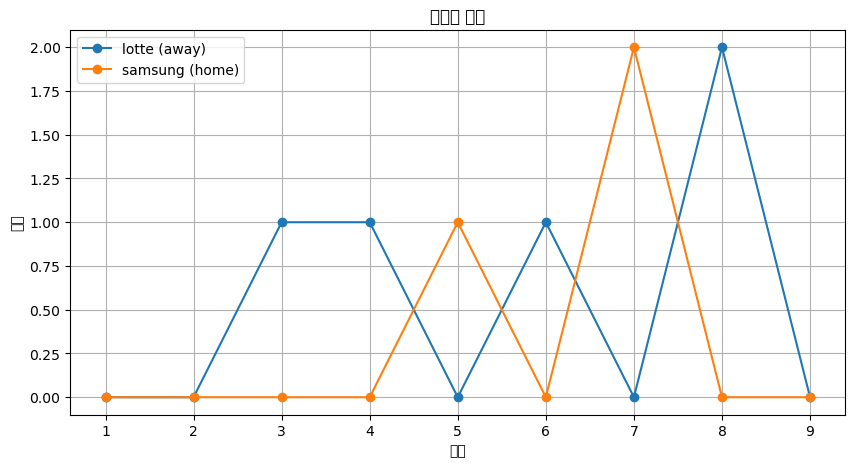

In [427]:
plt.figure(figsize=(10, 5))
plot_inning_scores("lotte (away)", result['away_inning_scores'])
plot_inning_scores("samsung (home)", result['home_inning_scores'])
plt.show()

In [428]:
def print_player_stats(team_name, stats_dict):
    print(f"\n📊 {team_name} 타자 성적")
    print("-" * 30)
    for player, stats in stats_dict.items():
        ab = stats['타수']
        hits = stats['안타']
        avg = hits / ab if ab > 0 else 0
        print(f"{player}: {ab}타수 {hits}안타 ({avg:.3f})")


In [429]:
print_player_stats("롯데", result['away_stats'])
print_player_stats("삼성", result['home_stats'])


📊 롯데 타자 성적
------------------------------
유강남: 4타수 2안타 (0.500)
나승엽: 4타수 0안타 (0.000)
전민재: 4타수 1안타 (0.250)
황성빈: 4타수 0안타 (0.000)
윤동희: 4타수 1안타 (0.250)
고승민: 4타수 0안타 (0.000)
장두성: 4타수 1안타 (0.250)
레이예스: 3타수 0안타 (0.000)
전준우: 3타수 2안타 (0.667)

📊 삼성 타자 성적
------------------------------
류지혁: 4타수 1안타 (0.250)
김성윤: 4타수 0안타 (0.000)
디아즈: 4타수 0안타 (0.000)
김지찬: 4타수 1안타 (0.250)
양도근: 4타수 2안타 (0.500)
강민호: 3타수 0안타 (0.000)
구자욱: 3타수 1안타 (0.333)
박병호: 3타수 0안타 (0.000)
이재현: 3타수 0안타 (0.000)


## 몬테카를로 알고리즘으로 n번 시행했을 때의 평균 점수, 승률 예측해보기

In [430]:
def simulate_game_monte_carlo(n_simulations, away_lineup, away_probs, home_lineup, home_probs):
    results = []
    for _ in range(n_simulations):
        game_result = simulate_game(away_lineup, away_probs, home_lineup, home_probs)
        results.append(game_result)
    return results

In [431]:
def summarize_results(results):
    away_total = [r['away_total'] for r in results]
    home_total = [r['home_total'] for r in results]
    print(f"평균 점수 (AWAY): {sum(away_total)/len(away_total):.2f}")
    print(f"평균 점수 (HOME): {sum(home_total)/len(home_total):.2f}")
    print(f"승률 (AWAY): {sum(1 for i in range(len(results)) if away_total[i] > home_total[i]) / len(results):.2%}")
    print(f"승률 (HOME): {sum(1 for i in range(len(results)) if home_total[i] > away_total[i]) / len(results):.2%}")

In [432]:
lotte_probs = compute_player_hit_probs(lotte_merged)
samsung_probs = compute_player_hit_probs(samsung_merged)

In [433]:
monte_results = simulate_game_monte_carlo(
    n_simulations=200,
    away_lineup=lotte_lineup,
    away_probs=lotte_probs,
    home_lineup=samsung_lineup,
    home_probs=samsung_probs
)

In [434]:
summarize_results(monte_results)

평균 점수 (AWAY): 5.86
평균 점수 (HOME): 4.45
승률 (AWAY): 55.00%
승률 (HOME): 34.00%
